## Getting Started with the TopoFlow Hydrologic Model

#### Table of Contents

1.  <a href="#facts_A">Key Facts About TopoFlow</a> <br>
2.  <a href="#install_A">How to Install the TopoFlow Python Package</a> <br>
3.  <a href="#package_A">Overview of the TopoFlow Python Package</a> <br>
4.  <a href="#history_A">TopoFlow Development History</a> <br>
5.  <a href="#emeli_A">The EMELI and EMELI-Web Frameworks</a> <br>
6.  <a href="#em_files_A">EMELI Provider Files - Choosing the Components to Use</a> <br>
7.  <a href="#data_prep_A">TopoFlow Input Files and Data Preparation</a> <br>
8.  <a href="#outfiles_A">TopoFlow Output Files and Visualization</a> <br>
9.  <a href="#sim1_A">Running Simulations for the Treynor River</a> <br>
10. <a href="#calibrate_A">How to Calibrate TopoFlow</a> <br>
11. <a href="#notebooks_A">Other Jupyter Notebooks for TopoFlow 3.6</a> <br>
12. <a href="#html_help_A">HTML Help Pages for TopoFlow Components</a> <br>
13. <a href="#refs_A">Key References for TopoFlow</a> <br>
14. <a href="#setup_A">Appendix 1:  Installing TopoFlow in a conda Environment</a>

<!-- Hyperlink IDs must be unique to work in Jupyter Lab when
there are multiple notebooks open. Hence the trailing letter. -->

## Key Facts About TopoFlow  <a id="facts_A"></a>

<ul>
<li>Written entirely in Python (83,000 lines of code)
<li>Plug-and-play, spatially-distributed hydrologic model based on <b>components</b>
<li>Distributed as a Python package  (installs with pip)
<li>Package includes numerous hydrologic process <b>components</b>
<li>Package includes numerous <b>utilities</b> for data preparation (D8 toolkit, pedotransfer, file I/O, etc.)
<li>Package includes data sets for testing in the <b>examples</b> folder
<li>Package includes the
<a href="http://academicworks.cuny.edu/cc_conf_hic/464/"> <b>EMELI framework</b></a>
for coupling BMI components into a model
<li>The EMELI framework automatically performs temporal alignment as needed.
<li>User-chosen components are coupled to create a complete, spatial hydrologic model
<li>Hydrologic processes are modeled using plug-and-play <b>components</b>
<li>Channel flow components: kinematic, diffusive and dynamic wave
<li>Infiltration components: Green-Ampt, Smith-Parlange and Richards 1D
<li>Evaporation components: Priestley-Taylor, Energy Balance
<li>Snowmelt components: Degree-Day, Energy Balance
<li>Meteorology component includes shortwave and longwave radiation calculators.
<li>Diversions component supports canals, sinks and sources.
<li>Every TopoFlow component exposes the
    <a href="https://csdms.colorado.edu/wiki/BMI_Description"><b>Basic Model Interface</b></a> (BMI)
<li>Every TopoFlow component supports
    <a href="https://csdms.colorado.edu/wiki/CSDMS_Standard_Names">
        <b>CSDMS Standard Names</b></a> for variables.
<li>The CSDMS Standard Names have evolved into the
    <a href="http://www.geoscienceontology.org/"><b>Scientific Variables Ontology</b></a>
<li>Every TopoFlow component has its own configuration file (CFG file)
<li>Every TopoFlow component has an HTML Help Page (e.g.
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Meteorology">
<b>Meteorology component</b></a>)
<li>Open source code, available on GitHub in the
    <a href="https://github.com/peckhams/topoflow36">
        <b>TopoFlow 3.6 repository</b></a>
<li>Current version is 3.6, updated to run in Python 3.x.
<li>The CSDMS model repository contains older versions.
<li>Uses only efficient
    <a href="https://numpy.org/"><b>Numpy</b></a>
    array operations and has <b>no</b> spatial loops.
<li>Development began in 2000, initially written in
    <a href="https://www.harrisgeospatial.com/Software-Technology/IDL">
        <b>IDL</b></a> (Interactive Data Language)
<li>Converted to Python/Numpy in 2008.
<li><a href="http://dx.doi.org/10.1002/2016EA000237"><b>Peckham et al. (2017)</b></a>
    is a recent, key paper on TopoFlow (also in the <b>docs</b> folder)
<li><a href="http://dx.doi.org/10.1016/S0166-2481(08)00025-1"><b>Peckham (2009)</b></a>
    describes the earlier IDL version of TopoFlow.
<li>Key TopoFlow References are listed at the bottom of this notebook
</ul>

## How to Install the TopoFlow Python Package  <a id="install_A"></a>

Before you can run the code in this notebook, you will need to install the TopoFlow 3.6 Python package.

Detailed instructions and background information for how to install TopoFlow in a conda environment are given in
<a href="#setup"><b>Appendix 1:  Installing TopoFlow in a conda Environment</b></a>.

## Overview of the TopoFlow Python Package  <a id="package_A"></a>

<b>The docs folder</b>.
This folder contains PDFs of key papers on TopoFlow and other useful information.

<b>The components folder</b>.
This folder contains TopoFlow's numerous hydrologic process components.
Each component exposes a standardized model API called the
<a href="https://csdms.colorado.edu/wiki/BMI_Description">
    <b>Basic Model Interface (BMI)</b></a>.
Every component inherits from BMI_base.py in the "utils" folder.  Each model component has its own configuration file, a text file with extension ".cfg".  Components may get their input data from other components in a component set (passed by reference), or directly from input files.  By editing model CFG files, users specify which output variables are to be saved to files (and at what "sampling timestep) and values of variables are then written to netCDF files (and optionally to some other file formats).  Each component also has its own very detailed HTML Help Page on the CSDMS wiki website.  These pages describe all of the variables and equations used by the component.  See the section below: "HTML Help Pages for TopoFlow Components", which has links to all of these.

<b>The utils folder</b>.
This folder contains a large collection of utilities that provide low-level functionality to all TopoFlow components.  Several of these provide APIs for reading input files or writing output files in several file formats, including netCDF.
A complete toolkit for computing a D8 flow direction grid and all related variables (like slope and total contributing area) from a DEM is also included. (This includes depression filling of the DEM and a "profile smoothing" tool.)
Also included are utilities for regridding, parameterization, pedotransfer functions, etc.

<b>The examples folder</b>
The "examples" folder contains several data sets for testing, including the Treynor watershed in Iowa with input data for two historic rainfall events both from June 1967.  (Treynor is a small watershed in the Nishnabotna river basin.)  Included in these examples are folders showing correct output files that can be used for testing.

<b>The framework folder</b>.
This folder contains the EMELI framework, which is described in more detail below.

<b>The gui_old folder</b>
This folder contains significant (but incomplete) efforts to create a wizard-style GUI for TopoFlow in Python using the
<a href="https://wxpython.org/"><b>wxPython</b></a> package.
This GUI is modeled after the GUI for the early IDL version of TopoFlow 1.6b.

## TopoFlow Development History  <a id="history_A"></a>

The best way to learn about TopoFlow --- including its history, capabilities, input data preparation and an example application --- is to read the paper in the "docs" folder of the TopoFlow Python package called:  "Peckham_et_al_2017_GPF.pdf", along with its appendices "Peckham_et_al_2017_GPF_Appendices.pdf".  This paper is also available
<a href="http://dx.doi.org/10.1002/2016EA000237"><b>online here</b></a>.

TopoFlow version 3.6 runs in Python 3.7 and contains over 82,500 lines of Python code.
Source code is available in the
<a href="https://github.com/peckhams/topoflow36"><b>topoflow36</b></a> repository on GitHub.

TopoFlow version 3.5 runs in Python 2.7 and contains over 75,000 lines of code.  It is no longer under active development, but code is available in the
<a href="https://github.com/peckhams/topoflow"><b>topoflow</b></a> repository on GitHub.

<a href="https://csdms.colorado.edu"><b>CSDMS</b></a>
uses an older version of TopoFlow 3.5 and also provides a graphical user interface via its Web Modeling Tool.  See:
<a href="https://csdms.colorado.edu/wiki/CSDMS_Web_Modeling_Tool">
    CSDMS Web Modeling Tool</a> and
<a href="https://csdms.colorado.edu/wiki/HydrologyExecutorBlanca">
    Hydrology Executor Blanca</a>. 

There is also an earlier version of TopoFlow (1.6b) with a wizard-style GUI written entirely in IDL.  It is no longer actively maintained.

## The EMELI and EMELI-Web Frameworks  <a id="emeli_A"></a>

<b>EMELI</b> (Experimental Modeling Environment for Linking and Interoperability) is a lightweight, model coupling framework written in Python that is included in the <b>framework</b> folder of the TopoFlow 3.6 Python package.  It can be used to automatically and dynamically couple any set of models that are written in Python or have Python bindings, as long as they each expose a valid BMI interface.

TopoFlow versions 3.5 and 3.6 each provide a plug-and-play, component-based modeling framework for spatial hydrologic modeling.  Both use the EMELI framework to couple a set of user-selected components into a functioning model. 

<a href="http://academicworks.cuny.edu/cc_conf_hic/464/"> <b>Peckham (2014)</b></a>
is a paper that describes EMELI in detail.
It is also included in the <b>docs</b> folder of the TopoFlow Python package, as:  "Peckham_2014_EMELI_FINAL.pdf".

<b>EMELI-Web</b> is a version of EMELI that couples and runs a set of TopoFlow components all running as web services on different servers.  Components share updated values of variables over the web as they run.  This is an elaborate example of model coupling over the web built on "Modeling as a Service" (MaaS) and the Basic Model Interface (BMI).  It was developed for the NSF-funded EarthCube GeoSemantics project.  A GUI and demonstration of EMELI-Web is
<a href="http://ecgs.ncsa.illinois.edu/emeli-web/"><b>available here</b></a>.
(It requires you to create a login first.)
Source code for EMELI-Web in BitBucket is
<a href="https://opensource.ncsa.illinois.edu/bitbucket/projects/ECGS/repos/emeli-web-application/browse"><b>available here</b></a>.

<a href="http://dx.doi.org/10.1016/j.envsoft.2017.01.021"> <b>Jiang et al. (2017)</b></a>
is a paper that describes EMELI-Web in detail.
It is also included in the <b>docs</b> folder of the TopoFlow Python package, as:
"Jiang_et_al_2017.pdf".

## EMELI Provider Files -- Choosing the Components To Use <a id="em_files_A"></a>

In order to tell EMELI which components you want to couple together to create a complete, spatial hydrologic model, you must list them by name in a simple text file called a <b>provider file</b>.  The filename for this file starts with the <b>case prefix</b>, because you will often choose a different set of components for different cases or scenarios you want to model.  The filename is just this case prefix plus <b>_providers.txt</b>.

EMELI will instantiate each of the listed model components as objects and will then check to make sure that each component can get all of the input variables it needs from other selected components (or on its own, from an input file).  EMELI "runs the clock", tells each component when to update its variables and orchestrates passing values of variables between all components.  If the components use different time steps, EMELI will automatically apply temporal interpolation.  For additional flexibility, a component can be disabled by setting a flag in its CFG file.  Disabled components are still instantiated but return only default values and do not perform any computation.

Provider files are very simple.  Here is an example that has the filename:  June_20_67_providers.txt.  The comments at the top are ignored, but show you the names of the components that are available for each hydrologic process.

<pre style="margin-left:0px;margin-top:0px">
# Available provider components by comp_type:
#
#     meteorology:   tf_meteorology
#     channnels:     tf_channels_kin_wave, tf_channels_diff_wave, tf_channels_dynam_wave
#     snow:          tf_snow_degree_day, tf_snow_energy_balance
#     evap:          tf_evap_priestley_taylor, tf_evap_energy_balance, tf_evap_read_file
#     infil:         tf_infil_green_ampt, tf_infil_smith_parlange, tf_infil_richards_1d, tf_infil_beven
#     satzone:       tf_satzone_darcy_layers
#     diversions:    tf_diversions_fraction_method
#     ice:           tf_ice_gc2d
#     hydro_model:   topoflow_driver
#     data:          tf_data_his
#     LEM:           erode_d8_global, erode_d8_local, dem_smoother
#     D8:            d8_global, d8_local
#
#----------------------------
# comp_type     component
#----------------------------
meteorology     tf_meteorology
diversions      tf_diversions_fraction_method
channels        tf_channels_kin_wave
snow            tf_snow_degree_day
satzone         tf_satzone_darcy_layers
evap            tf_evap_priestley_taylor
infil           tf_infil_green_ampt
ice             tf_ice_gc2d
hydro_model     topoflow_driver
</pre>


## TopoFlow Input Files and Data Preparation  <a id="data_prep_A"></a>

TopoFlow requires many different input files, depending on which components are selected.  There is another Jupyter notebook called
<a href="https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Utils_Demo1.ipynb">
<b>TopoFlow_Utils_Demo1.ipynb</b></a>
that shows how to use TopoFlow utilities to prepare most of these input files.

TopoFlow uses a <b>site_prefix</b> for all of the filenames in a data set that pertain to the geographic location (the "site"). These files describe static properties of the location, such as topography and soil. The site prefix is often the name of a river basin, such as "Baro-Gam_60sec" for the Baro River with mouth near Gambella, Ethiopia.

TopoFlow uses a <b>case_prefix</b> for all of the filenames in a data set that describe a particular model scenario (the "case" under consideration). These files describe things that can change from one model run to the next for the same site. Note that component CFG filenames always start with the case prefix.  A case prefix might be named after a particular storm event, such as "June_20_67", or something simple like "Case1" or "Test1".  All output filenames start with the case prefix.

There are a couple of special CFG files that are not associated with any single process model component.  One of these is called: <b>CASE_PREFIX_path_info.cfg</b>, which is a simple "key-value" text file.  It is where you specify input and output directories for a model run, along with the site_prefix and case_prefix.  Here is an example:

<pre style="margin-left:0px;margin-top:0px">
#===============================================================================
# TopoFlow Config File for: Path_Information
#===============================================================================
in_directory   | .                      | string  | input directory
out_directory  | ~/TF_Output/Treynor    | string  | output directory
site_prefix    | Treynor                | string  | file prefix for the study site
case_prefix    | June_20_67             | string  | file prefix for the model scenario
</pre>

<b>Note:</b> TopoFlow 3.6 now supports storing files that are derived from or related to the topography in a separate folder called <b>\__topo</b>, within the CFG directory.  The presence or absence of this separate folder will be automatically detected by TopoFlow. Similarly, soil data files can be put in a separate folder called <b>\__soil</b>, and meteorology-related files can be put in a separate folder called <b>\__met</b>.  No changes to CFG files (including CASE_PREFIX_path_info.cfg) are necessary to use this new feature.

## TopoFlow Output Files and Visualization  <a id="outfiles_A"></a>

TopoFlow stores values of output variables in multiple file formats, but the main one is <b>netCDF format</b>.  There is another Jupyter notebook called
<a href="https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Visualization_v2.ipynb">
<b>TopoFlow_Visualization_v2.ipynb</b></a>
that shows how to read values of variables from TopoFlow netCDF output files and to then visualize them.

In a model component's CFG file, there are toggles that determine which variables are to be written to files, and how often.  Since TopoFlow is a spatial hydrologic model, most variables are computed on a grid (2D array) that changes with each model time step.  Users can choose to write out this entire grid to a file at some time interval (save_grid_dt), and/or they can write out values for specific grid cells (0D) within the grid at some other time interval (save_pixels_dt).

<b>Important Note:</b> TopoFlow will never overwrite an output file that already exists in a given directory, but will instead append "_1", "_2", "_3" etc. to the output filename, just before the extension.  So if you repeat a model run multiple times, you will accumulate many files in the output directory, and the ones with the highest-numbered suffix (and most recent date/time stamp) will be the most recent set.  This is a potential "gotcha" when visualizing or analysing model output.

<b>The Log File.</b>  The "final report" information you see printed to the session window at the end of a model run are also saved in a file called:  <b>CASE_PREFIX.log</b>, in the output directory.  

The various types of TopoFlow output can be summarized as follows.  In each case, the output file contains values of some variable (say V) that <b>vary in time</b>, that is, a <b>series</b>.  Output filenames start with the <b>case prefix</b>.  The dimensionality of the output is indicated in the output file name with "0D_", "1D_", "2D_" or "3D_" followed by a variable name abbreviation (e.g. "Q" or "d-flood").

<b>0D = Time series</b> (or Point series) <br>
Scalar values of V, at one or more model grid cells. <br>
Formats:  (1) netCDF, and (2) multi-column text (i.e. CSV) <br>
Utility:  topoflow/utils/ncts_files.py <br>
Example:  river depth over time for given grid cell <br>
Note:     monitored grid cells are specified in [case_prefix]_outlets.txt. <br>

<b>1D = Profile series</b> <br>
A 1D array of values of V, at one or more grid cells . <br>
Formats: (1) netCDF<br>
Utility:  topoflow/utils/ncps_files.py<br>
Example:  1D, vertical slice of a 3D array (e.g. soil moisture profile) <br>
Note:     Chosen grid cells are specified in [case_prefix]_outlets.txt. <br>

<b>2D = Grid series (or stack)</b> <br>
A 2D array of values of V, for the entire model grid (all cells).<br>
Formats:  (1) netCDF, (2) RTS, (3) BOV <br>
Utility:  topoflow/utils/ncgs_files.py <br>
Example:  river discharges for the entire model grid <br>

<b>3D = "Cube" series</b> <br>
A 3D array of values of V, for entire model grid and various depths.<br>
Formats:  (1) netCDF <br>
Utility:  topoflow/utils/nccs_files.py <br>
Example:  3D array of subsurface soil moisture (grid + depth). <br>


## Running Simulations for the Treynor River in Iowa<a id="sim1_A"></a>

The TopoFlow 3.6 Python package includes all of the input files required to run various tests in the <b>examples</b> folder.  In this section we show how to run some of these tests using files in the <b>topoflow/examples/Treynor_Iowa_30m</b> folder.

On June 7, 1967 and on June 20, 1967, this river basin experienced two intense rainstorms, each with a probability of occurring only once in every 100 years. The figures below show the measured rainfall rates, the measured river discharge, and the river discharge predicted by TopoFlow for each of these storms.

<table> <tr>
  <td> 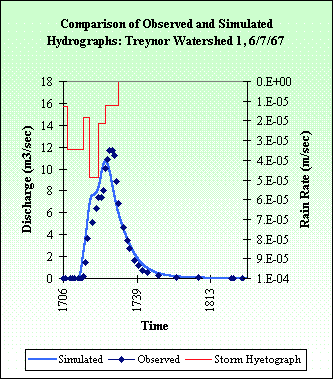
  <td> 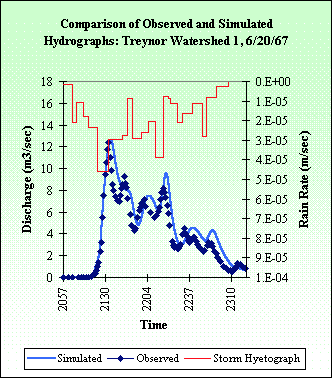
</tr> </table>

<b>Figure</b>. Comparison of river discharge (hydrograph) at the outlet of the Treynor watershed predicted by TopoFlow to measured values during two 100-year storms that occurred in June of 1967.  The red curve shows rainfall rates (hyetograph) during the storms.

### June 7, 1967 Rain Storm

First we will perform a model run for the June 7, 1967 storm.  All of the input files for this river basin and this rainfall event are included as sample data in the TopoFlow 3.6 package, in the folder: <b>examples/Treynor_Iowa_30m/</b>.

For this simulation, we are using the <b>Channel Flow - Kinematic Wave</b> component, the <b>Metorology</b> component and (a bit later) the <b>Richards 1D Infiltration</b> component.  All of the other hydrologic process components are currently turned off (or disabled).

We begin by importing two required TopoFlow modules that we will use for all of the model runs.

In [1]:
from topoflow.framework import emeli
examples_dir  = emeli.paths['examples']
cfg_directory = examples_dir  + 'Treynor_Iowa_30m/'

from topoflow import main
time_interp_method = 'None'
# time_interp_method = 'Linear'

Importing TopoFlow 3.6 package modules:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
 


In [2]:
# Run this cell to run the model
cfg_prefix    = 'June_07_67'
cfg_dir = cfg_directory + '__No_Infil_June_07_67_Rain/'
main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

EMELI: Reading info from provider_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/examples/Treynor_Iowa_30m/__No_Infil_June_07_67_Rain/June_07_67_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_green_ampt
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
In met_base read_input_files():
   time = 0.0
   min(P) = 45.720001220703125 [mmph]
   max(P) = 45.720001220703125 [mmph]

### June 20, 1967 Rain Storm

Next, we perform a model run for the June 20, 1967 storm.  All of the input files for this river basin and this rainfall event are also included as sample data in the TopoFlow 3.6 package, in the folder: <b>examples/Treynor_Iowa_30m/</b>.

In [3]:
# Run this cell to run the model
cfg_prefix = 'June_20_67'
cfg_dir = cfg_directory + '__No_Infil_June_20_67_Rain/'
main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

EMELI: Reading info from provider_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/examples/Treynor_Iowa_30m/__No_Infil_June_20_67_Rain/June_20_67_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_green_ampt
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
In met_base read_input_files():
   time = 0.0
   min(P) = 0.0 [mmph]
   max(P) = 0.0 [mmph]
 
---------------------------

## Uniform Rainfall, Rate 30 mmph, for 75 minutes (scalar type)

For the next several sections, we are showing the flexibility of TopoFlow with regard to allowing virtually any input variable to be specified as a <b>Scalar</b>, <b>Time Series</b>, <b>Grid</b> or <b>Grid Stack</b>.  All of these use the Richards 1D Infiltration component.

In [4]:
# Run this cell to run the model
cfg_prefix = 'Test1'
cfg_dir = cfg_directory + '__Richards_1layer_30mmph_75min_rain_scalar/'
main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

EMELI: Reading info from provider_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/examples/Treynor_Iowa_30m/__Richards_1layer_30mmph_75min_rain_scalar/Test1_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_richards_1d
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
Scalar rainrate set to: 30.0  [mmph]
------------------------------------------
 NOTE: Since PRECIP_ONLY = Tr

## Uniform Rainfall, Rate 30 mmph, for 75 minutes (time series type)

In [5]:
# Run this cell to run the model
cfg_prefix = 'Test1'
cfg_dir = cfg_directory + '__Richards_1layer_30mmph_75min_rain_series/'
main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

EMELI: Reading info from provider_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/examples/Treynor_Iowa_30m/__Richards_1layer_30mmph_75min_rain_series/Test1_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_richards_1d
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
In met_base read_input_files():
   time = 0.0
   min(P) = 29.999999999999996 [mmph]
   max(P) = 29.9999999999

## Uniform Rainfall, Rate 30 mmph, for 75 minutes (grid type)

In [6]:
# Run this cell to run the model
cfg_prefix = 'Test1'
cfg_dir = cfg_directory + '__Richards_1layer_30mmph_75min_rain_grid/'
main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

EMELI: Reading info from provider_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/examples/Treynor_Iowa_30m/__Richards_1layer_30mmph_75min_rain_grid/Test1_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_richards_1d
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
In met_base read_input_files():
   time = 0.0
   min(P) = 30.000000333529897 [mmph]
   max(P) = 30.000000333529

## Uniform Rainfall, Rate 30 mmph, for 75 minutes (grid stack type)

In [7]:
# Run this cell to run the model
cfg_prefix = 'Test1'
cfg_dir = cfg_directory + '__Richards_1layer_30mmph_75min_rain_stack/'
main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

EMELI: Reading info from provider_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/examples/Treynor_Iowa_30m/__Richards_1layer_30mmph_75min_rain_stack/Test1_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_richards_1d
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
In met_base read_input_files():
   time = 0.0
   min(P) = 30.000000333529897 [mmph]
   max(P) = 30.00000033352

## Additional Tests  (not on GitHub yet)

In [12]:
# Run this cell to run the model
#cfg_prefix = 'Test1'

# These tests not ready yet
# cfg_dir = cfg_directory + '__No_Infil_30mmph_scalar_rain/'
# cfg_dir = cfg_directory + '__No_Infil_30mmph_series_rain/'
# cfg_dir = cfg_directory + '__No_Infil_30mmph_grid_rain/'
#--------------------------------------------------------------------------
# These tests not ready yet
# cfg_dir = cfg_directory + '__Richards_3layer_30mmph_scalar_rain/'
# cfg_dir = cfg_directory + '__Richards_3layer_30mmph_series_rain/'
# cfg_dir = cfg_directory + '__Richards_3layer_30mmph_grid_rain/'

# main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_directory,
#               time_interp_method=time_interp_method)

## How to Calibrate TopoFlow <a id="calibrate_A"></a>

There is a separate Jupyter notebook that explains how to calibrate the TopoFlow model, at:
https://github.com/peckhams/topoflow36/blob/master/notebooks/TopoFlow_Calibration_Gauge_Data.ipynb

## Other Jupyter Notebooks for TopoFlow 3.6  <a id="notebooks_A"></a>

There is a growing collection of Jupyter notebooks to demonstrate the functionality of the TopoFlow 3.6 hydrologic model and its numerous utilities.  These are all available at:
https://github.com/peckhams/topoflow36.

Peckham, S.D. (2019) A Jupyter notebook for getting started with TopoFlow 3.6.  https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Getting_Started.ipynb.

Peckham, S.D. (2019) A Jupyter notebook to illustrate new data preparation utilities in TopoFlow 3.6.  https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Utils_Demo1.ipynb.

Peckham, S.D. (2019) A Jupyter notebook to create visualizations of model output from TopoFlow 3.6. (version 2) https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Visualization_v2.ipynb.

Peckham, S.D. (2020) A Jupyter notebook that discusses the use of global rainfall products such as GPM and GLDAS as inputs to TopoFlow.
https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Rainfall_Inputs.ipynb.

Peckham, S.D. (2020) A Jupyter notebook that discusses the flood modeling (overbank flow) capabilities of TopoFlow 3.6.
https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Flood_Modeling.ipynb.

Peckham, S.D. (2020) A Jupyter notebook with a simple model calibration exercise for TopoFlow 3.6, using gauge data.
https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Calibration_Gauge_Data.ipynb.

Peckham, S.D. (2020) A Jupyter notebook to check and explore the TopoFlow solar radiation utilities, which includes shortwave and longwave radiation calculators. (Only shows a few of the capabilities so far.)
https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Radiation.ipynb.

## HTML Help Pages for TopoFlow Components  <a id="html_help_A"></a>

Every TopoFlow component has its own HTML Help Page, which use the standard HTML Help template developed for the
<a href="https://csdms.colorado.edu/wiki/Main_Page"><b>CSDMS project</b></a>.
This section provides direct links to all of these help pages.

<b>Channel Flow Process</b>
<ul><li>
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Channels-Kinematic_Wave">
    Kinematic Wave Method</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Channels-Diffusive_Wave">
    Diffusive Wave Method</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Channels-Dynamic_Wave">
    Dynamic Wave Method</a>
</ul>

<b>Infiltration Process</b>
<ul><li>
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Infiltration-Green-Ampt">
    Green-Ampt Method</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Infiltration-Smith-Parlange">
    Smith-Parlange 3-Parameter Method</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Infiltration-Richards_1D">
    Richards' 1D Equation Method</a>
</ul>
&nbsp;&nbsp;&nbsp;  Note:  There is also a "Beven Method" component, infil_beven.py.<br>

<b>Evaporation Process</b>
<ul><li>
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Evaporation-Priestley_Taylor">
    Priestley-Taylor Method</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Evaporation-Energy_Balance">
    Energy Balance Method</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Evaporation-Read_File">
    Read File Method</a>
</ul>

<b>Snowmelt and Icemelt Process</b>
<ul><li>
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Snowmelt-Degree-Day">
    Degree-Day Snowmelt Method</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Snowmelt-Energy_Balance">
    Energy-Balance Snowmelt Method</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:Gc2d">
    GC2D Valley Glacier and Icemelt Model</a>, &nbsp;&nbsp;
</ul>

<b>Other Hydrologic Process Components</b>
<ul><li>
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Meteorology">
    Meteorology Component</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Diversions">
    Flow Diversions (Fraction Method)</a>, &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Saturated_Zone-Darcy_Layers">
    Saturated Zone (Darcy Layer Method)</a>, &nbsp;&nbsp;
</ul>

<b>Fluvial Landscape Evolution Models</b>
<ul><li>
<a href="https://csdms.colorado.edu/wiki/Model_help:Erode-D8-Global">
    Erode D8-Global</a>,  &nbsp;&nbsp;
<a href="https://csdms.colorado.edu/wiki/Model:Erode-D8-Local">
    Erode D8-Local</a>
</ul>    
 

## Key References for TopoFlow  <a id="refs_A"></a>

Peckham, S.D., M. Stoica, E.E. Jafarov, A. Endalamaw and W.R. Bolton (2017) Reproducible, component-based modeling with TopoFlow, a spatial hydrologic modeling toolkit, Earth and Space Science,4(6), 377-394, special issue: Geoscience Papers of the Future, American Geophysical Union, http://dx.doi.org/10.1002/2016EA000237.

Peckham, S.D. (2009) Geomorphometry and spatial hydrologic modeling, In: Hengl, T. and Reuter, H.I. (Eds), Geomorphometry: Concepts, Software and Applications, Chapter 25, Developments in Soil Science, vol. 33, Elsevier, 579-602, http://dx.doi.org/10.1016/S0166-2481(08)00025-1.  (TopoFlow)

Jiang, P., M. Elag, P. Kumar, S.D. Peckham, L. Marini, R. Liu (2017) A service-oriented architecture for coupling web service models using the Basic Model Interface (BMI), Environmental Modelling & Software, 92, 107-118, http://dx.doi.org/10.1016/j.envsoft.2017.01.021.

Zhang, Z., D.L. Kane and L.D. Hinzman (2000) Development and application of a spatially-distributed Arctic hydrological and thermal process model (ARHYTHM),
Hydrological Processes, 14(6), 1017-1044,
<a href="https://doi.org/10.1002/(SICI)1099-1085(20000430)14:6<1017::AID-HYP982>3.0.CO;2-G">
    https://doi.org/10.1002/(SICI)1099-1085(20000430)14:6<1017::AID-HYP982>3.0.CO;2-G</a>.

Peckham, S.D. (2014a) EMELI 1.0:  An experimental smart modeling framework for automatic coupling of self-describing models, Proceedings of HIC 2014, 11th International Conf. on Hydroinformatics, New York, NY. CUNY Academic Works, http://academicworks.cuny.edu/cc_conf_hic/464/.

Peckham, S.D. (2014b) The CSDMS Standard Names:  Cross-domain naming conventions for describing process models, data sets and their associated variables, Proceedings of the 7th Intl. Congress on Env. Modelling and Software, International Environmental Modelling and Software Society (iEMSs), San Diego, CA. (Eds.  D.P. Ames, N.W.T. Quinn, A.E. Rizzoli),  Paper 12. http://scholarsarchive.byu.edu/iemssconference/2014/Stream-A/12/.

Peckham, S.D., E.W.H. Hutton and B. Norris (2013) A component-based approach to integrated modeling in the geosciences: The Design of CSDMS, Computers & Geosciences, special issue: Modeling for Environmental Change, 53, 3-12, http://dx.doi.org/10.1016/j.cageo.2012.04.002.

Peckham, S.D. (2018) Using the open-source TopoFlow Python package for extracting D8 grids from DEMs and for fluvial landscape evolution modeling, Proceedings of Geomorphometry 2018, Boulder, CO, pp. O-11-1 to O-11-4, http://2018.geomorphometry.org/Peckham_2018_geomorphometry.pdf


## Appendix 1: Installing TopoFlow in a conda Environment  <a id="setup_A"></a>

To run this Jupyter notebook, it is recommended to use Python 3.7 from an Anaconda distribution and to install the required Python packages in a conda environment called <b>tf36</b>.  This prevents conflicts with other Python packages you may have installed.
The Anaconda distribution includes many packages from the
[<b>Python Standard Library</b>](https://docs.python.org/3/library/).

First, download the TopoFlow 3.6 package from GitHub repo "topoflow36" at:
<b>https://github.com/peckhams/topoflow36</b>.
Copy or unzip the package into some directory on your computer.  Let's refer to this full path as TF36_DIR.  e.g. TF36_DIR = /Users/peckhams/Dropbox/TopoFlow_3.6

Installing TopoFlow 3.6 with pip causes most of its dependencies to be installed automatically.  However, if you want to run the growing collection of Jupyter notebooks (such as this one) that highlight TopoFlow functionality, you will also need to install the
[<b>nb_conda</b>](https://docs.anaconda.com/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/) package, and optionally the <b>jupyterlab</b> package (see below).
In addition, some of the new TopoFlow utilities (e.g. regrid.py and visualize.py) require the
[<b>gdal</b>](https://pypi.org/project/GDAL/) and
[<b>matplotlib</b>](https://matplotlib.org/) packages.
Simply type the following commands at an OS prompt after installing Anaconda and downloading TopoFlow.

``` bash
% conda update -n base conda
% conda create --name tf36
% conda activate tf36
% conda list
% conda install nb_conda
% conda install gdal
% conda install matplotlib
% conda install imageio
% pip install imageio-ffmpeg  (an imageio extension)
% cd TF36_DIR
% pip install -e .   (-e is the editable/developer option)
```

<b>Note:</b>  The <b>pip</b> package manager is used to install TopoFlow 3.6, since it is not available as a conda package.  (It gets installed when you install <b>nb_conda</b>.) However, like conda, pip will install a package and its dependencies into the currently active conda environment, as explained
[<b>in these docs</b>](https://docs.conda.io/projects/conda/en/4.6.1/user-guide/tasks/manage-pkgs.html#installing-non-conda-packages).  If you switch to another environment with <b>conda activate envname</b>, you can confirm that topoflow (or cfunits, gdal, netcdf4, etc.) is not there with <b>conda list</b>. 

<b>Note:</b>  Some of the new TopoFlow utilities use a Python package version of [<b>GDAL</b>](https://pypi.org/project/GDAL/).  At the time of this writing, installing <b>gdal</b> from the <b>conda-forge </b> with <i>conda install -c conda-forge gdal</i> did not work.

<b>Note:</b> The netCDF4 package will be installed as a TopoFlow dependency.

#### <b>Conda Environments</b>

Note that <b>conda</b> is the name of the package manager for the popular Anaconda Python distribution.  One feature of conda is support for multiple environments, which are isolated from one another.  When you install Anaconda, an environment called <b>base</b> is created for you and a base set of commonly-used Python packages are installed there.  However, you can (and should!) create additional, named environments and install different sets of Python packages into them without worrying about potential conflicts with packages in other environments.  Type <b>conda env list</b> to list your available environments.  You can switch to one of your other environments using the command <b>conda activate envname</b>.  (Replace "envname" with the name of an environment.) You can switch back to the base environment with the command <b>conda deactivate</b>.  It is better not to install new packages into the base environment.  See the online conda documentation on [<b>Managing Environments</b>](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) for more information.

It is always a good idea to update conda itself before creating new environments and installing packages in them. The "-n" flag is followed by the name of the environment to update, and the "-c" flag is followed by the name of the <b>channel</b> from which to get packages.  A channel is a collection of Python packages that are provided and maintained by some group.  The word "defaults" refers to
[<b>Anaconda's own collection</b>](https://docs.anaconda.com/anaconda/packages/pkg-docs/), while
[<b>conda-forge</b>](https://conda-forge.org/feedstocks/)
refers to another popular collection and the GitHub organization that maintains it.  Many Python packages are available from both of these channels.  (However, the ipyleaflet and pydap  packages are currently not available in the Anaconda collection.) When you are installing several packages into an environment, the potential for installation problems seems to be less if you get them all from the same channel.  Keep in mind that packages you install will likely depend on many other Python packages, so there is a potential for conflicts, usually related to different package versions.  Using conda environments helps to mitigate against this and helps with <b>reproducibility</b>.

Once you've switched to an environment with <b>conda activate envname</b>, you can type <b>conda list</b> to see a list of packages.  If you do this right after you create a new environment you will see that it contains no packages.  If you do this right after installing each package above you will see that:

<ul>
    <li>Installing <b>nb_conda</b> triggers installation of <b>nb_conda_kernels</b> (2.2.3),
        <b>ipykernel</b> (5.3.0), <b>notebook</b> (6.0.3), <b>pip</b> (20.0.2),
        <b>setuptools</b> (46.4.0) and <b>traitlets</b> (4.3.3), among many others. 
    <li>Installing <b>gdal</b> triggers installation of #######.
    <li>Installing <b>matplotlib</b> triggers installation of ##########. 
</ul>

#### <b>Jupyter Notebook Extensions</b>

Note that <b>nb_conda</b> is installed first above, and triggers installation of <b>nb_conda_kernels</b> along with <b>notebook</b>.  This is important as it makes your Jupyter notebook app aware of your conda environments and available in the app as "kernels".  Anaconda provides a helpful page on the
[<b>Jupyter Notebook Extensions</b>](https://docs.continuum.io/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/).
That page also explains how you can enable or disable these extensions individually. The command <b>jupyter nbextension list</b> shows you the extensions that are installed and whether they are enabled.  If you run the <b>jupyter notebook</b> or <b>jupyter lab</b> command in an environment that has <b>nb_conda_kernels</b> installed (see below), you will have the ability to associate one of your available conda environments with any new notebook you create.  Different environments give rise to different <b>kernels</b> in Jupyter, and the kernel name includes the environment name, e.g. <b>Python \[conda env:tf36\]</b>.  The kernel name is displayed in the upper right corner.  Notebooks typically open with the "environment kernel" they were created with. However, there is a <b>Change Kernel</b> option in the <b>Kernel</b> menu in the Jupyter app menu bar. (After changing the kernel, you may need to choose <b>Restart</b> from the <b>Kernel</b> menu.

#### <b>Cloning a conda Environment</b>

If your notebook is working but then you want to import additional packages (possibly with many dependencies, and potential for problems), you can keep the first environment but clone it with
<b><i>conda create --name clonename --copy --clone envname</i></b>,
and then install the additional packages in the clone.  This way, you can switch to the new environment's kernel and try to run your notebook, but if you run into any problems you can easily revert back to the original environment and functionality.

<b>Note:</b> Setting the "--copy" flag installs all packages using copies instead of hard or soft links.  This is necessary to avoid problems when using <b>pip</b> together with <b>conda</b> as described [<b>on this page</b>](https://stackoverflow.com/questions/43879119/installing-tensorflow-in-cloned-conda-environment-breaks-conda-environment-it-wa).

#### <b>Running Notebooks in the Jupyter Notebook App</b>

When you want to run the notebook, type <b>conda activate tf36</b> (at an OS command prompt) to activate this environment.  Then change to the directory that contains this notebook and type <b>jupyter notebook</b>.  By default, this folder is called <b>Jupyter</b> and is in your home directory.  In the app, choose this notebook by name, "TopoFlow_Getting_Started.ipynb", and make sure to choose the kernel called:  <b>Python \[conda env:tf36\]</b>.  See the References section at the end for more info.

#### <b>Running Notebooks in the JupyterLab App</b>

The
[<b>JupyterLab</b>](https://jupyterlab.readthedocs.io/en/stable/index.html)
app is a cool, new successor to the Notebook app and offers many additional features.  If you want to use this notebook in JupyterLab, you need to install one more Python package, as follows.

``` bash
% conda activate tf36
% conda install jupyterlab
```

You launch the JupyterLab app by typing <b>jupyter lab</b> instead of <b>jupyter notebook</b>.  To quit, choose <b>Logout</b> or <b>Shutdown</b> from the app's <b>File</b> menu.

#### <b>JupyterLab Extensions</b>

The Jupyter project provides documentation on
[<b>JupyterLab Extensions</b>](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)
which add capabilities to JupyterLab.  For example, after installing jupyterlab (see just above), if you want to use the <b>ipywidgets</b> and <b>ipyleaflet</b> Python packages, you need to install two extensions, as follows:
```
% conda activate tf36
% jupyter labextension install jupyter-leaflet
% jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
To list the jupyter labextensions you have, and to see whether or not they are enabled, type <b>jupyter labextension list</b>.  <b>Note:</b> If you start jupyterlab from a conda environment in which a given extension is not installed, and then open or switch to a notebook which uses a different "environment kernel", one that requires that extension, the notebook may not work.

You should only install trusted extensions, due to security concerns, as explained in the documentation.  Third-party extensions pose a potential security risk.  An extension that allows you to play MP4 movie files in JupyterLab is
[<b>available on GitHub</b>](https://github.com/jupyterlab/jupyterlab-mp4)
(by Ian Rose of the JupyterLab organization)
and can be installed with the command:
```
% jupyter labextension install @jupyterlab/mp4-extension
```
<b>Note:</b> This command is from a pull-request on the extension's github repo.
Using the command: "jupyter labextension install jupyterlab-mp4" results in the
following error message:<br>
An error occured.
ValueError: "jupyterlab-mp4" is not a valid npm package

As of May 27, 2020, JupyterLab has added an experimental <b>Extension Manager</b> which can be enabled by choosing Settings > Enable Extension Manager in the app.
